In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
too_many_na = []
for col in train.columns:
    if (train[col].isna().sum() > len(train) * 0.7):
        too_many_na.append(col)
        train = train.drop(col, axis='columns')
print(too_many_na)

PoolQC는 수영장의 품질을 나타내는 특성이지만 대부분의 집은 수영장이 없어서 선택되었다. PoolArea는 수영장이 없는 집은 0으로 표시되어 선택되지 않았고 수영장을 가진 집도 7건 밖에 되지 않아 삭제하기로 결정하였다.

In [ ]:
hasPool = train['PoolArea']
hasPool.loc[hasPool > 0] = 1
hasPool.value_counts()
train = train.drop('PoolArea', axis='columns')

모두 동일한 값을 가지거나 Id처럼 모든 행들이 유니크한 값들을 가지는 경우 값을 삭제

In [ ]:
too_unique = []
for col in train.columns:
    cnt_unique = train[col].nunique()
    if (cnt_unique == 1 or cnt_unique == len(train)):
        train = train.drop(col, axis='columns')
        too_unique.append(col)
print(too_unique)

In [ ]:
object_columns = []
numeric_columns = []
for col in train.columns:
    if (train[col].dtype == 'object'):
        object_columns.append(col)
    else:
        numeric_columns.append(col)
print(object_columns)

In [ ]:
dummy_train = pd.get_dummies(train, columns=object_columns)

In [ ]:
scaler = StandardScaler()
scale_columns = list(numeric_columns)
scale_columns.remove('SalePrice')
df_scaled = pd.DataFrame(dummy_train)
df_scaled[scale_columns] = pd.DataFrame(scaler.fit_transform(dummy_train[scale_columns]))
df_scaled

In [ ]:
target = "SalePrice"
correlation_table = df_scaled.set_index(target).reset_index().corr().abs().sort_values(by=target, ascending=False)
correlation_table.head(20)

Garage

In [ ]:
garage_cars = train["GarageCars"].unique()
garage_cars.sort()

for count in garage_cars:
    area = train.loc[train["GarageCars"] == count, ["GarageArea"]]
    min_val = area.min()
    max_val = area.max()
    print(count, min_val[0], max_val[0])

In [ ]:
train["GarageAreaPerCars"] = train["GarageArea"] * train["GarageCars"]
train[["GarageArea", "GarageCars", "GarageAreaPerCars"]]
target = "SalePrice"
train.set_index(target).reset_index().corr().abs().sort_values(by=target, ascending=False)

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

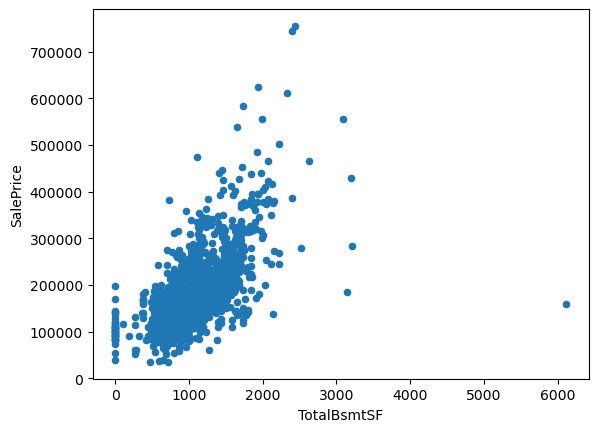

In [56]:
col = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[col]], axis=1)
data.plot.scatter(x=col, y="SalePrice")

<AxesSubplot: >

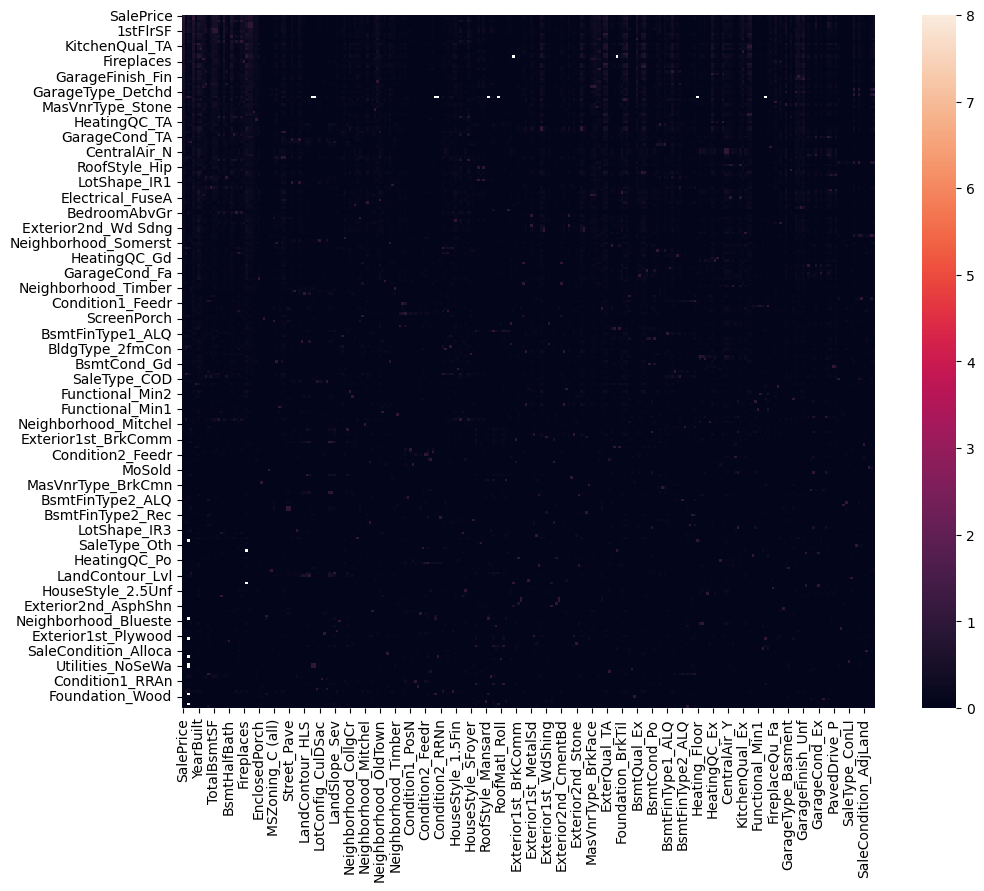

In [65]:
f, axis = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_table, vmax=8, square=True)

C:\Users\D568\AppData\Local\Temp\ipykernel_5740\511113425.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


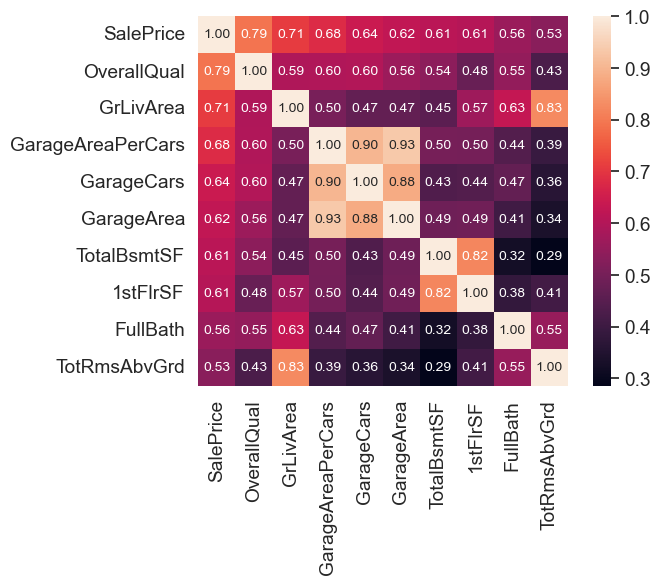

In [66]:
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

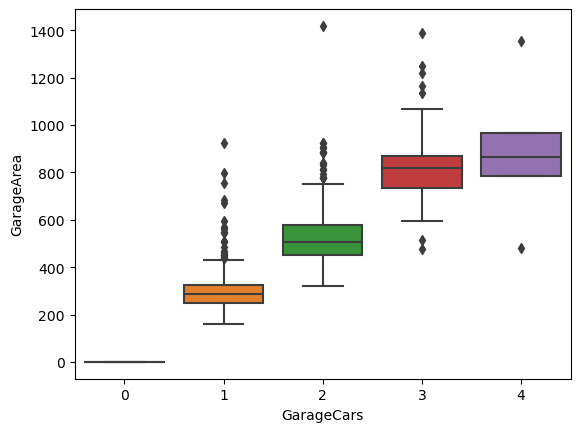

In [63]:
garage_data = pd.concat([train["GarageCars"], train["GarageArea"]], axis=1)
f, axis = plt.subplots()
fig = sns.boxplot(x="GarageCars", y="GarageArea", data=garage_data)

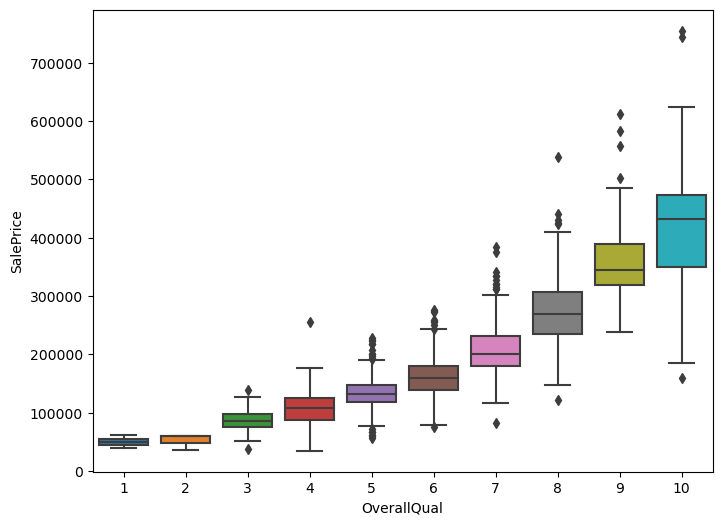

In [58]:
col = 'OverallQual'
data = pd.concat([train['SalePrice'], train[col]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=col, y="SalePrice", data=data)


c:\Users\D568\anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


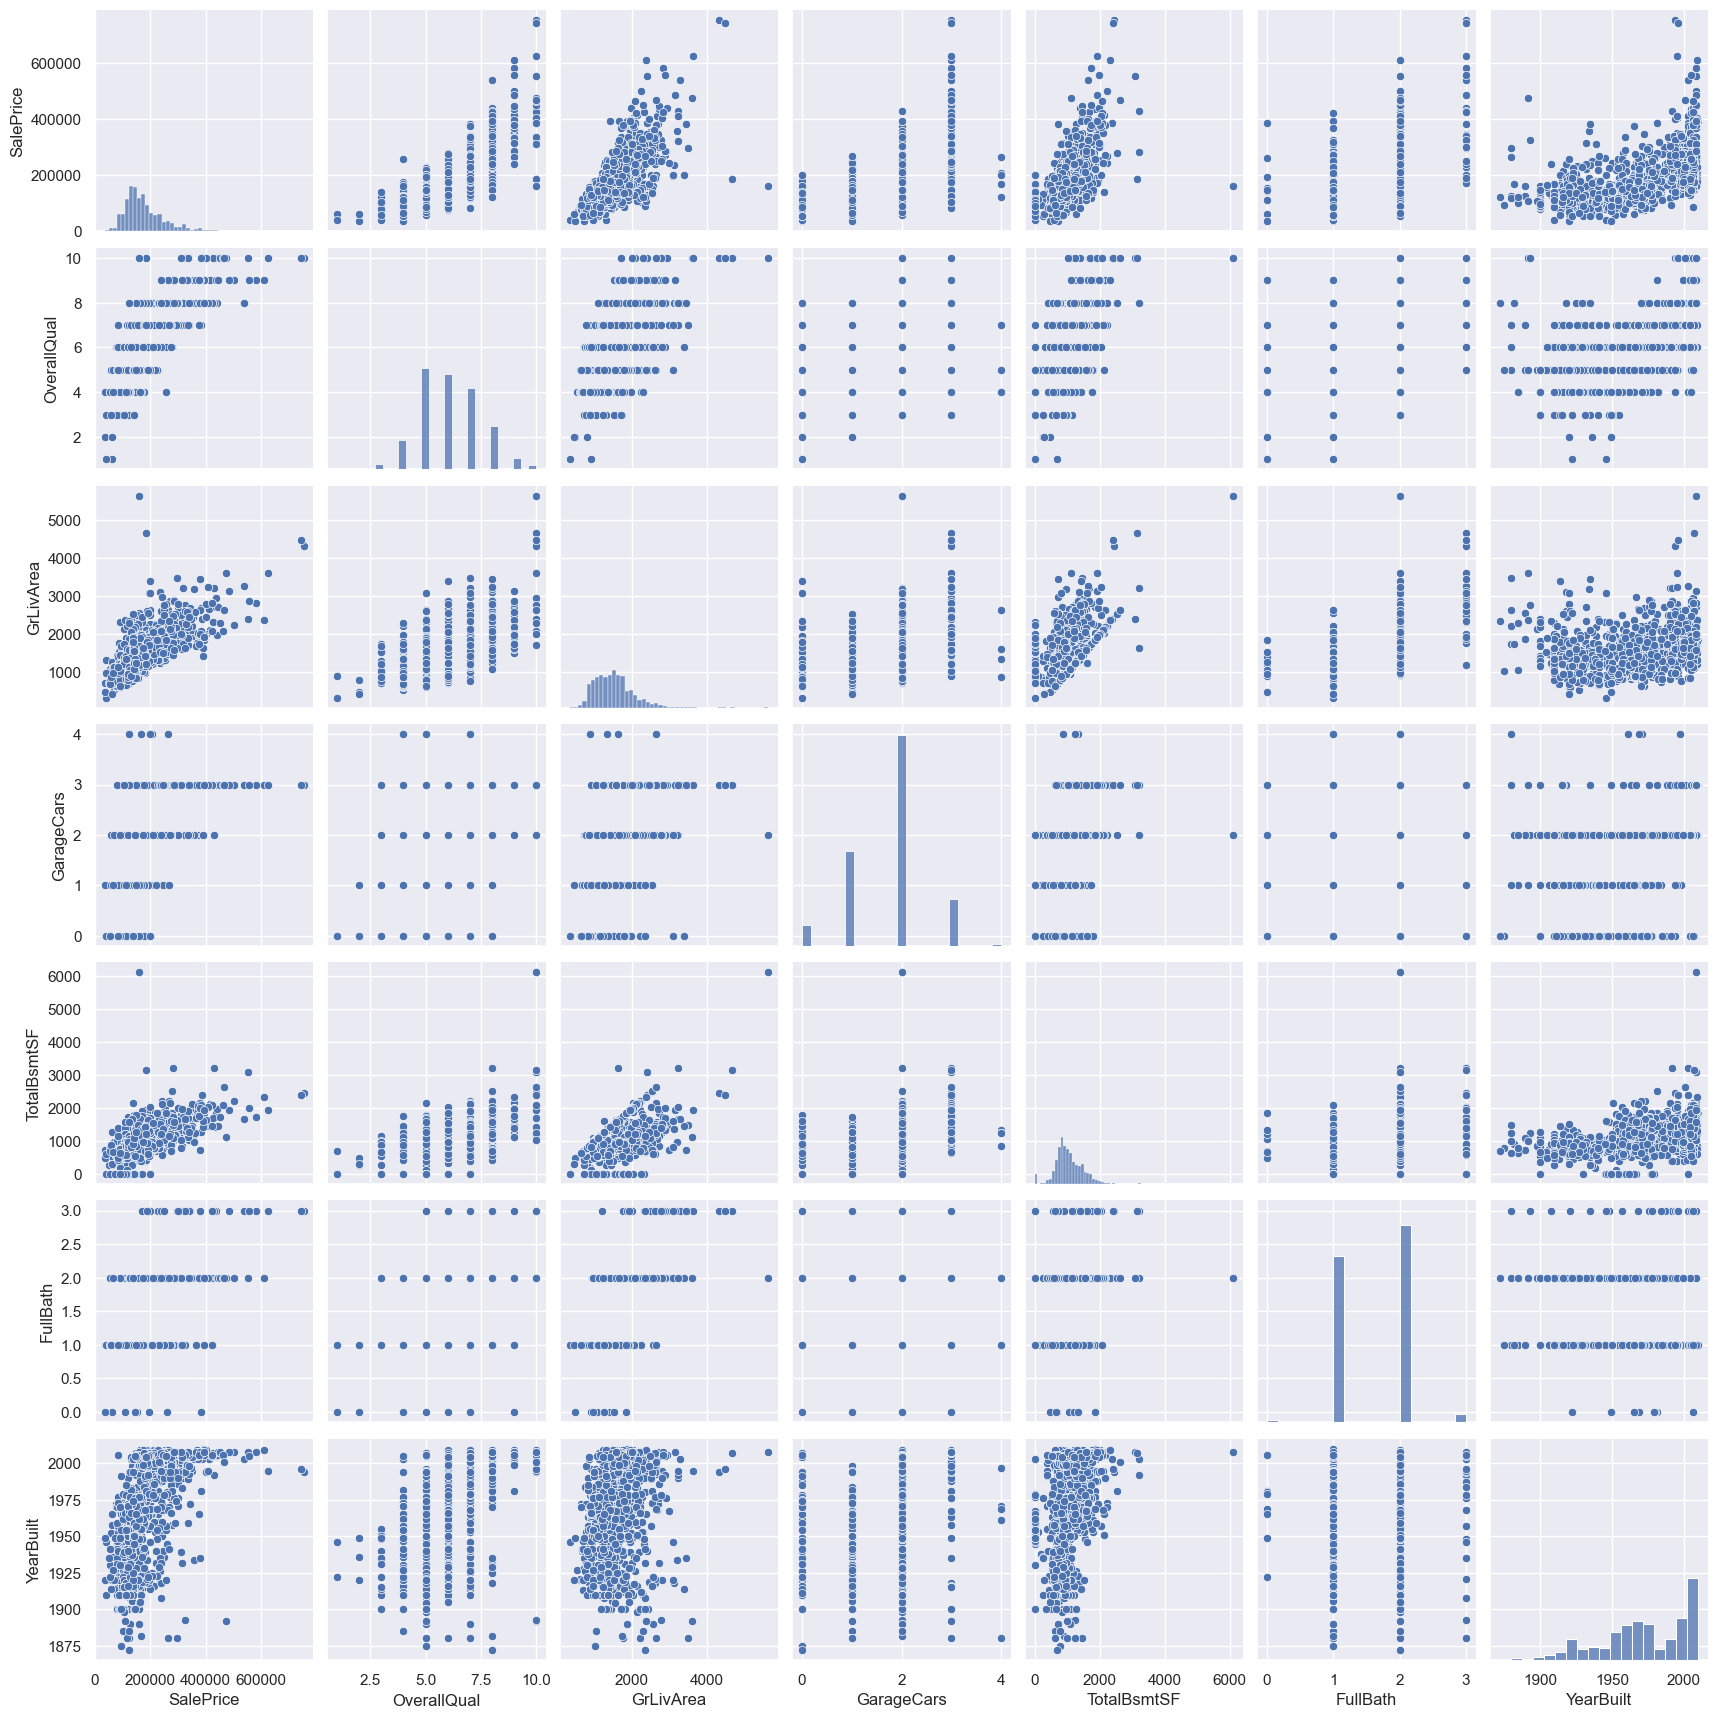

In [67]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size=2.5)
plt.show()